<a href="https://colab.research.google.com/github/SHaruto0/CSCI-4170-Project-in-AI-and-ML/blob/main/HW2/Haruto_Suzuki_HW2_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Refer to PDF for Analysis

#Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, precision_score, f1_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from xgboost import XGBClassifier

from scipy.stats import ttest_rel

import warnings
warnings.filterwarnings("ignore")

#Load Uploaded Data

In [17]:
df = pd.read_excel("credit_card_data.xls")

In [18]:
print(df.head())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0   

In [19]:
labels = df['default payment next month'].value_counts(normalize=True)
print(labels)

default payment next month
0    0.7788
1    0.2212
Name: proportion, dtype: float64


#Data Manipulation for Training

In [20]:
# Drop ID column
df.drop(columns=["ID"], inplace=True)

If we do want to train with the same features as HW1, we can remove features with High ViF value. However, since Decision Tree is immune to highly correlated features, so I will keep them for the rest of the notebook. Also, Decision Tree can handle any value since it considers each features independently, I would not have to normalize data like with Logistic Regression.

In [46]:
# df_reduced = df.drop(columns=['SEX','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'])
# df_reduced.head()

In [23]:
X = df.drop(columns=["default payment next month"])
y = df["default payment next month"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

#Decision Tree with 3 hyperparameter sets

Accuracy: 0.8193333333333334


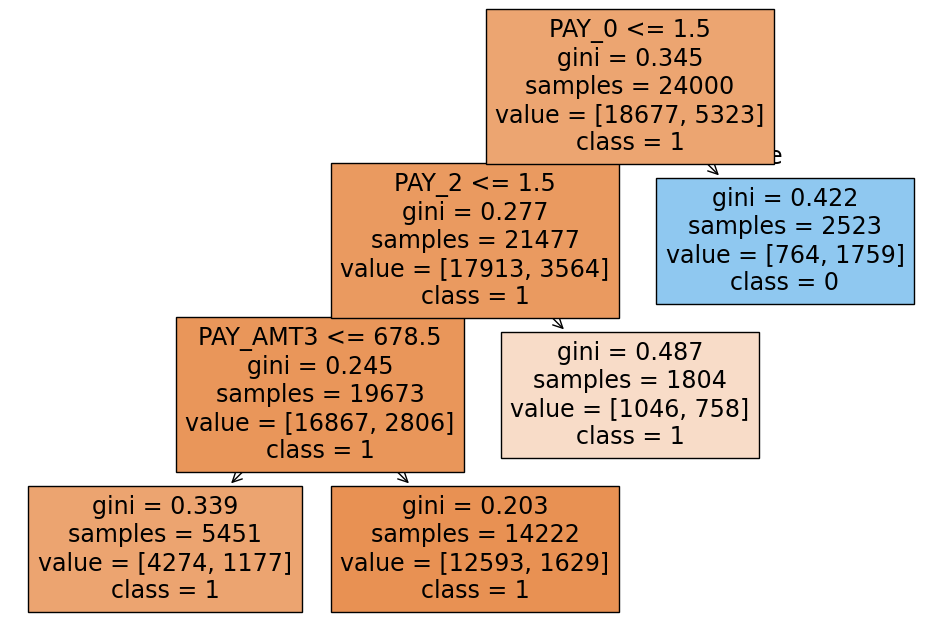

In [24]:
# Combination 1
param = {
    'criterion': 'gini',
    'max_depth': 3,
    'min_samples_split': 5000,
    'min_samples_leaf': 10,
    'random_state': 42
}

# Model and Train
clf = DecisionTreeClassifier(**param)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# For Visualizing
feature_names = df.columns.tolist()
class_names = [str(cls) for cls in df["default payment next month"].unique()]

# Visualize Tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=feature_names, class_names=class_names)
plt.savefig(f"decision_tree_1.png")
plt.show()

Accuracy: 0.8193333333333334


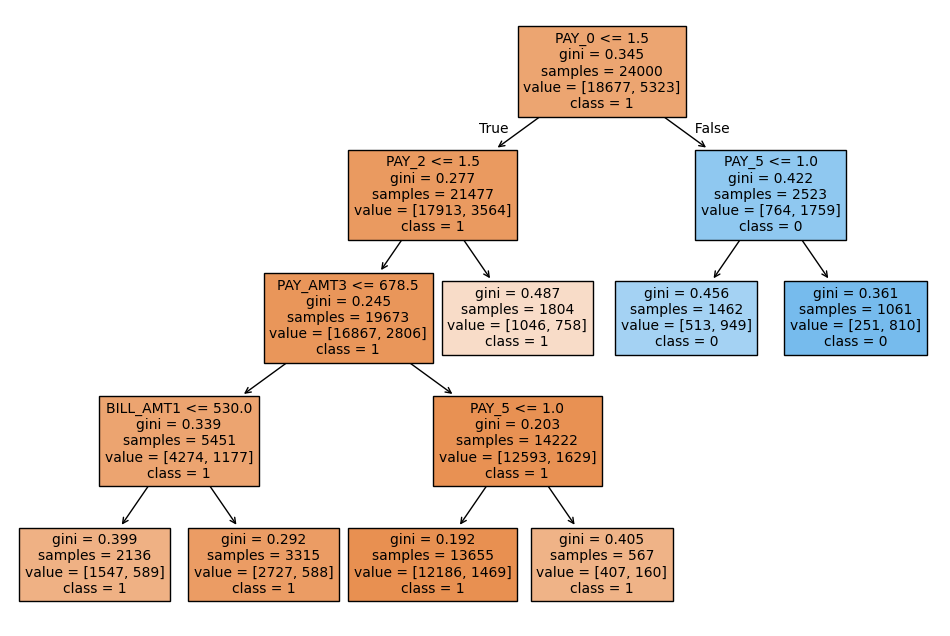

In [25]:
# Combination 2
param = {
    'criterion': 'gini',
    'max_depth': 4,
    'min_samples_split': 2000,
    'min_samples_leaf': 500,
    'random_state': 42
}

# Model and Train
clf = DecisionTreeClassifier(**param)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# For Visualizing
feature_names = df.columns.tolist()
class_names = [str(cls) for cls in df["default payment next month"].unique()]

# Visualize Tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=feature_names, class_names=class_names)
plt.savefig(f"decision_tree_2.png")
plt.show()

Accuracy: 0.8193333333333334


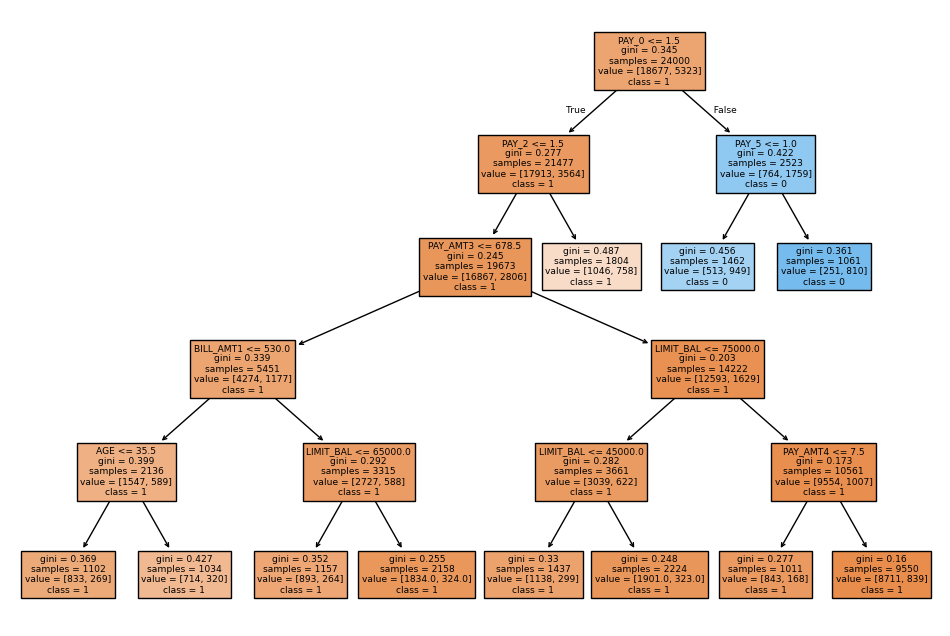

In [47]:
# Combination 3
param = {
    'criterion': 'gini',
    'max_depth': 5,
    'min_samples_split': 100,
    'min_samples_leaf': 1000,
    'random_state': 42
}

# Model and Train
clf = DecisionTreeClassifier(**param)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# For Visualizing
feature_names = df.columns.tolist()
class_names = [str(cls) for cls in df["default payment next month"].unique()]

# Visualize Tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=feature_names, class_names=class_names)
plt.savefig(f"decision_tree_3.png")
plt.show()

Accuracy: 0.7255


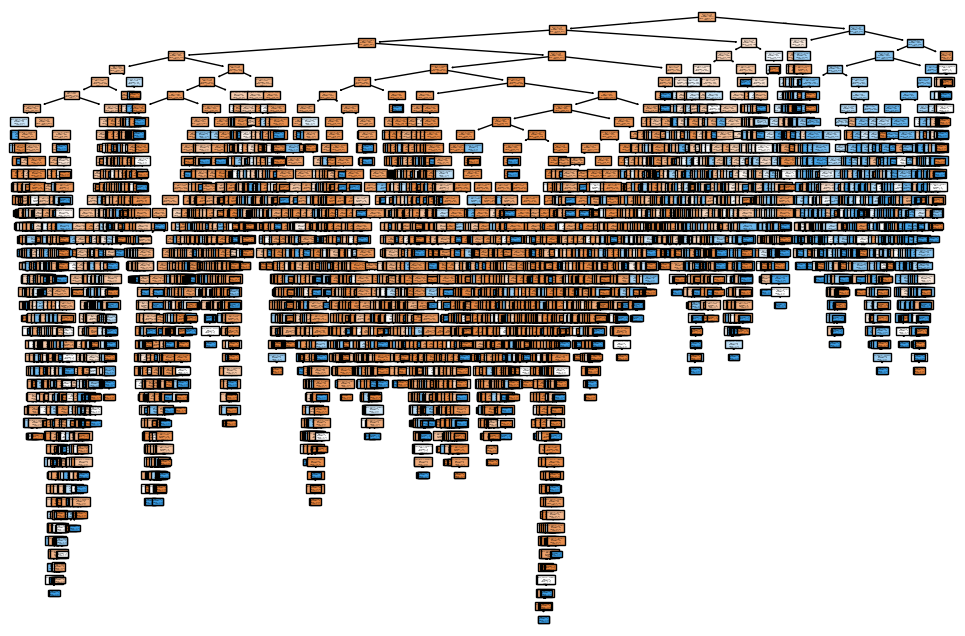

In [ ]:
# Combination 4
param = {
    'criterion': 'gini',
    'max_depth': 100,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'random_state': 42
}

# Model and Train
clf = DecisionTreeClassifier(**param)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# For Visualizing
feature_names = df.columns.tolist()
class_names = [str(cls) for cls in df["default payment next month"].unique()]

# Visualize Tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=feature_names, class_names=class_names)
plt.savefig(f"decision_tree_4.png")
plt.show()

#Sensitivity Analysis

I will be conduction sensitivity analysis with my own adjustments. I will be calculating the importance of each features and create multiple Decision Tree models with the first N numbers of features. This may be different from what is expected or how it's actually done but I couldn't find much resources on implementations

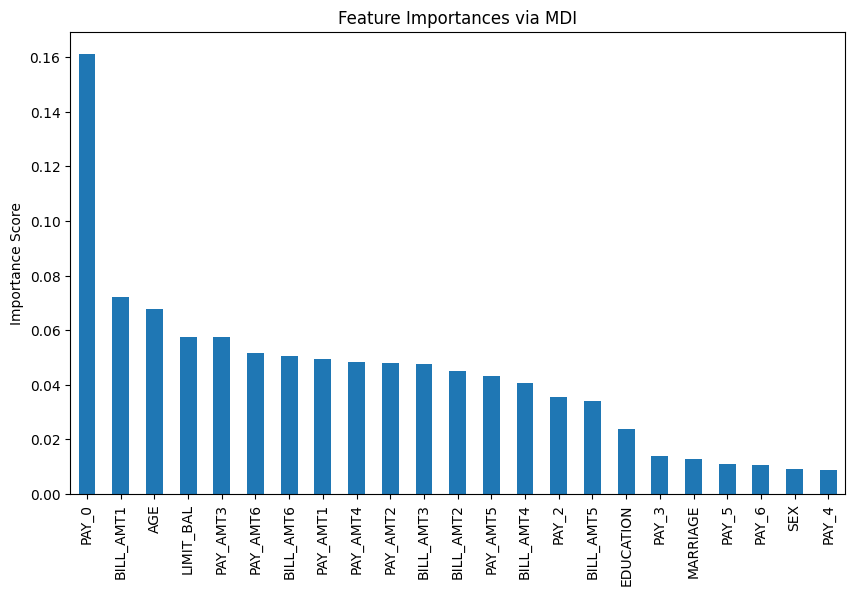

In [45]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Extract feature importances
importances = model.feature_importances_
feature_names = X_train.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10,6))
feature_importances.plot(kind='bar')
plt.title('Feature Importances via MDI')
plt.ylabel('Importance Score')
plt.savefig("feature_importances.png")
plt.show()


2 features: Accuracy = 0.7392
4 features: Accuracy = 0.7163
6 features: Accuracy = 0.7233
8 features: Accuracy = 0.7187
10 features: Accuracy = 0.7355
12 features: Accuracy = 0.7278
14 features: Accuracy = 0.7347
16 features: Accuracy = 0.7158
18 features: Accuracy = 0.7270
23 features: Accuracy = 0.7238


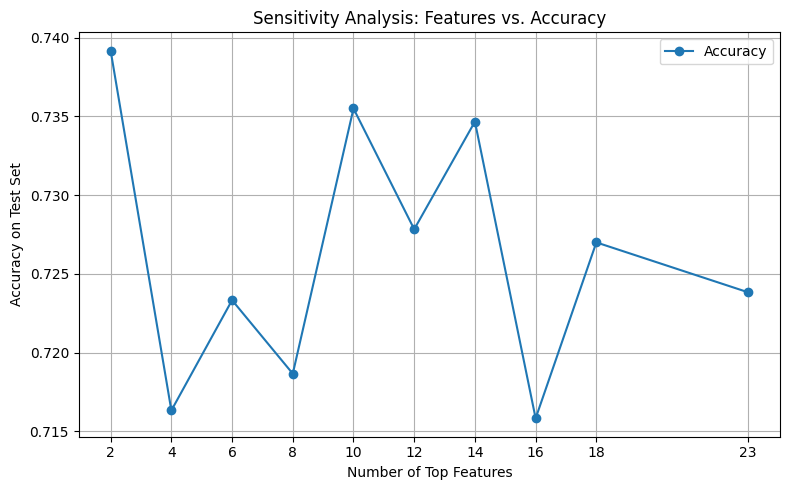

In [44]:
param = {
    'criterion': 'gini',
    'max_depth': 4,
    'min_samples_split': 2000,
    'min_samples_leaf': 500,
    'random_state': 42
}

# Fit once to get global feature importances
model = DecisionTreeClassifier(random_state=42)
# model = DecisionTreeClassifier(**param)
model.fit(X_train, y_train)
importances = model.feature_importances_

# Create DataFrame of importances
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Evaluate performance across top-N features
feature_counts = [2, 4, 6, 8, 10, 12, 14, 16, 18, X.shape[1]]
accuracies = []

for count in feature_counts:
    top_features = feature_importances['feature'].head(count).tolist()
    # print(top_features)
    X_train_subset = X_train[top_features]
    X_test_subset = X_test[top_features]

    model = DecisionTreeClassifier(random_state=42)
    # model = DecisionTreeClassifier(**param)
    model.fit(X_train_subset, y_train)
    y_pred = model.predict(X_test_subset)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f'{count} features: Accuracy = {acc:.4f}')

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(feature_counts, accuracies, marker='o', linestyle='-', label='Accuracy')
plt.xlabel('Number of Top Features')
plt.ylabel('Accuracy on Test Set')
plt.title('Sensitivity Analysis: Features vs. Accuracy')
plt.grid(True)
plt.xticks(feature_counts)
plt.legend()
plt.tight_layout()
plt.savefig("sensitivity_analysis.png")
plt.show()

#Bagging and Boosting Ensemble Methods

Let's see Random Forest and XGBoost in action

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest (Bagging)
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# XGBoost (Boosting)
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\nXGBoost Results:")
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))


Random Forest Results:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.69      0.24      0.36      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.61      0.62      6000
weighted avg       0.79      0.81      0.77      6000

Accuracy: 0.8106666666666666

XGBoost Results:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.67      0.35      0.46      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000

Accuracy: 0.8198333333333333


#Let's observe the performance using stratified K-fold cross validation

In [ ]:
# Models
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, use_label_encoder=False,
                    eval_metric='logloss', random_state=42)

# Evaluation metrics
def evaluate_model(model, X, y, k):
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    accs, precs, recalls, f1s = [], [], [], []

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accs.append(accuracy_score(y_test, y_pred))
        precs.append(precision_score(y_test, y_pred))
        recalls.append(recall_score(y_test, y_pred))
        f1s.append(f1_score(y_test, y_pred))

    return np.mean(accs), np.mean(precs), np.mean(recalls), np.mean(f1s)

# K values
folds = [5, 10, 20, 30]
rows = []

for k in folds:
    rf_scores = evaluate_model(rf, X, y, k)
    xgb_scores = evaluate_model(xgb, X, y, k)
    rows.append([k, "Random Forest"] + list(rf_scores))
    rows.append([k, "XGBoost"] + list(xgb_scores))

# Create and print DataFrame
df_eval = pd.DataFrame(rows, columns=["Folds", "Model", "Accuracy", "Precision", "Recall", "F1-score"])
print(df_eval)

   Folds          Model  Accuracy  Precision    Recall  F1-score
0      5  Random Forest  0.814933   0.689315  0.297467  0.415546
1      5        XGBoost  0.819333   0.667183  0.366034  0.472684
2     10  Random Forest  0.815400   0.689029  0.301236  0.418752
3     10        XGBoost  0.820533   0.673391  0.366640  0.474539
4     20  Random Forest  0.814767   0.686097  0.299429  0.416419
5     20        XGBoost  0.820433   0.672645  0.366936  0.474533
6     30  Random Forest  0.814500   0.686826  0.296561  0.413530
7     30        XGBoost  0.819233   0.668961  0.362721  0.469794


#Confusion Matrix of the Above Models

* Decision Tree
* Random Forest
* XGBoost

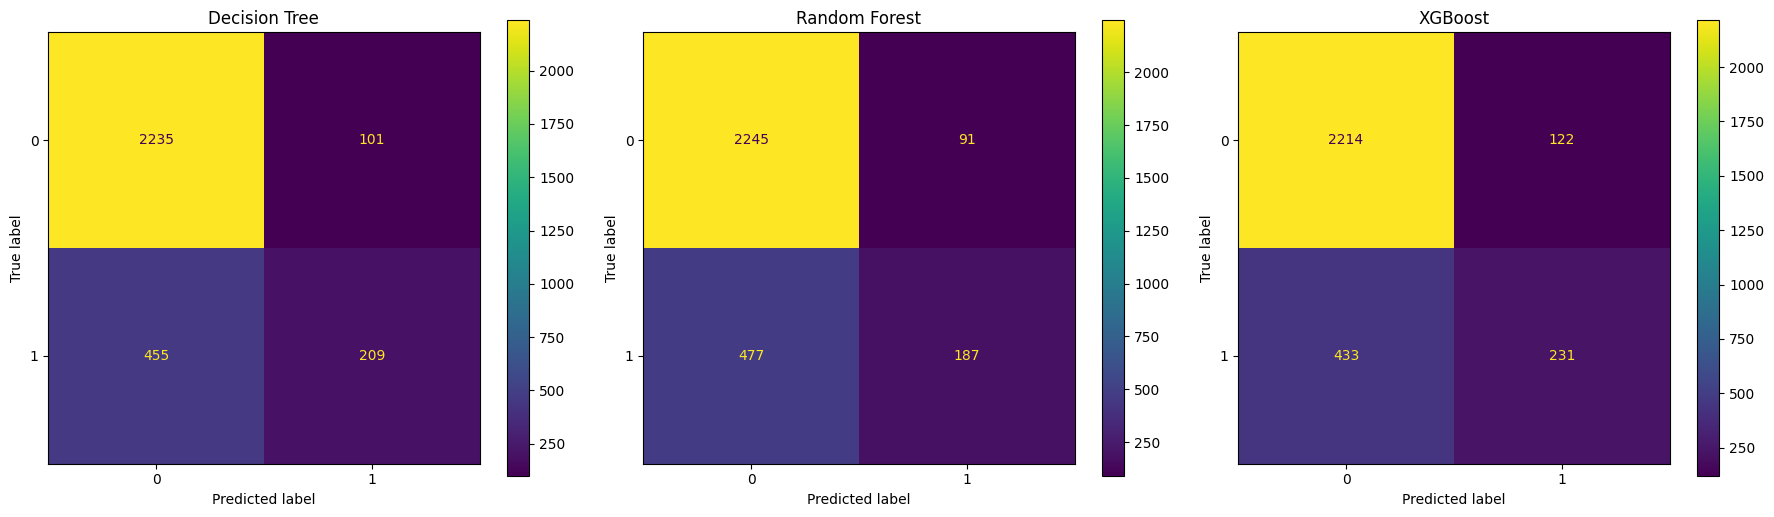

Decision Tree Metrics:
Accuracy: 0.8147, Precision: 0.6742, Recall: 0.3148, F1-score: 0.4292

Random Forest Metrics:
Accuracy: 0.8107, Precision: 0.6727, Recall: 0.2816, F1-score: 0.3970

XGBoost Metrics:
Accuracy: 0.8150, Precision: 0.6544, Recall: 0.3479, F1-score: 0.4543


In [ ]:
def get_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

# Use one fold from Stratified K-Fold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
train_index, test_index = next(iter(skf.split(X, y)))
X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

# Define models
dt_param = {
    'criterion': 'gini',
    'max_depth': 3,
    'min_samples_split': 5000,
    'min_samples_leaf': 10,
    'random_state': 42
}
dt = DecisionTreeClassifier(**dt_param)
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5,
                    use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train models
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

# Predict
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

# Get metrics
dt_metrics = get_metrics(y_test, y_pred_dt)
rf_metrics = get_metrics(y_test, y_pred_rf)
xgb_metrics = get_metrics(y_test, y_pred_xgb)

# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_dt)).plot(ax=axes[0], values_format='d')
axes[0].set_title("Decision Tree")

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf)).plot(ax=axes[1], values_format='d')
axes[1].set_title("Random Forest")

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_xgb)).plot(ax=axes[2], values_format='d')
axes[2].set_title("XGBoost")

plt.tight_layout()
plt.savefig("confusion_matrices.png")
plt.show()

print("Decision Tree Metrics:")
print(f"Accuracy: {dt_metrics[0]:.4f}, Precision: {dt_metrics[1]:.4f}, Recall: {dt_metrics[2]:.4f}, F1-score: {dt_metrics[3]:.4f}\n")
print("Random Forest Metrics:")
print(f"Accuracy: {rf_metrics[0]:.4f}, Precision: {rf_metrics[1]:.4f}, Recall: {rf_metrics[2]:.4f}, F1-score: {rf_metrics[3]:.4f}\n")
print("XGBoost Metrics:")
print(f"Accuracy: {xgb_metrics[0]:.4f}, Precision: {xgb_metrics[1]:.4f}, Recall: {xgb_metrics[2]:.4f}, F1-score: {xgb_metrics[3]:.4f}")

#Statistical Test to Compare Performance

Paird T-Test

Smaller p value indicates that the difference is significant. A positive t score implies that the first input is performing better than the second input. A negative t score implies that the second input is performing better than the first input.

In [ ]:
# Models
dt_param = {
    'criterion': 'gini',
    'max_depth': 3,
    'min_samples_split': 5000,
    'min_samples_leaf': 10,
    'random_state': 42
}
dt = DecisionTreeClassifier(**dt_param)
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5,
                    use_label_encoder=False, eval_metric='logloss', random_state=42)

# Stratified K-Fold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
dt_scores, rf_scores, xgb_scores = [], [], []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    dt.fit(X_train, y_train)
    rf.fit(X_train, y_train)
    xgb.fit(X_train, y_train)

    dt_scores.append(accuracy_score(y_test, dt.predict(X_test)))
    rf_scores.append(accuracy_score(y_test, rf.predict(X_test)))
    xgb_scores.append(accuracy_score(y_test, xgb.predict(X_test)))

# Paired t-tests
pairs = [
    ("Decision Tree vs Random Forest", dt_scores, rf_scores),
    ("Decision Tree vs XGBoost", dt_scores, xgb_scores),
    ("Random Forest vs XGBoost", rf_scores, xgb_scores)
]

for name, a_scores, b_scores in pairs:
    t_stat, p_value = ttest_rel(a_scores, b_scores)
    print(f"{name}: t = {t_stat:.4f}, p = {p_value:.4f}")


Decision Tree vs Random Forest: t = 7.7744, p = 0.0000
Decision Tree vs XGBoost: t = -0.9728, p = 0.3561
Random Forest vs XGBoost: t = -5.4058, p = 0.0004


The code is ran with an arbitrary set of hyperparameter for Decision Tree, Random Forest, XGBoost.

In this case, Decision Tree performs better than Random Forest, XGBoost performs somewhat better than Decision Tree, and finally XGBoost performs better than Random Forest. With this information, we can conclude that XGBoost performs the best.